In [1]:
import re
import nltk
import webbrowser
import time 
import tweepy
import numpy as np
import pandas as pd    
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
from dotenv import load_dotenv
load_dotenv('john.env')


Bad key "text.kerning_factor" on line 4 in
C:\Users\jakel\anaconda3\envs\ml2env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


True

In [2]:
consumer_key = os.getenv('TWITTER_API')
consumer_secret = os.getenv('TWITTER_SECRET_KEY')

In [3]:
type(consumer_key)

NoneType

In [32]:
# API Authentication 
callback_uri = 'oob'                                                      # declare a uniform resource indicator, and set to 'out-of-band'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)   # creates an authentication object. stores our consumer and secret key. 
redirect_url = auth.get_authorization_url()                               # stores the API authorization url used to get a PIN number                             
webbrowser.open(redirect_url)                                             # Opens web and redirects you to Twitter app authorization website. Click Authorize and it provides a PIN number.
prompt = '>'                                                              # Enter the PIN number here. 
print('enter PIN number at the prompt. Hit enter.')
user_PIN = input(prompt)                                                  # enter the PIN number in prompt and now you'll have an access token. 
auth.get_access_token(user_PIN)                                           # Uses the PIN to generate an access token.
print('Your access key ', auth.access_token)                              # This key does not change regardless how many different PIN numbers you get.
print('The secret key ', auth.access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)                           # Create a tweepy API object with the access token. Set wait_on_rate_limit to reset after 15 minutes.

enter PIN number at the prompt. Hit enter.
Your access key  18325825-cHvbx5Kpg6HFjIrFYo8wfr8jheadKCXjUNQG57BvU
The secret key  Bk14J5TH5g4YmZvRmra7u23uwrkfwgWrNHHs0v4G0Ttby


In [6]:
search_t = 'elonmusk'
posts = api.user_timeline(screen_name= search_t, count=200, lang='en', tweet_mode='extended')

In [7]:
all_tweets= [tweet.full_text for tweet in posts]

df = pd.DataFrame(
    all_tweets,
    columns=['Tweets']
)

df.shape

(22, 1)

In [8]:
pd.set_option('display.max_colwidth', -1)
df.sample(10)

,Tweets
17,RT @Tesla: Giga Texas: 6 months ago vs this week https://t.co/CAgmIJ3wKQ
12,@RationalEtienne @thesheetztweetz @BryceSpaceTech @SpaceX @roscosmos @Arianespace @ArianeGroup @northropgrumman @RocketLab @ulalaunch @VirginOrbit @torybruno Mass to orbit is the fundamental metric for making life multiplanetary
10,"@WholeMarsBlog This should be clear to anyone who has experienced the FSD beta evolution. \n\nSelf-driving requires solving a major part of real-world AI, so it’s an insanely hard problem, but Tesla is getting it done. \n\nAI Day will be great."
3,@markgurman @tim_cook Higgins managed to make his book both false *and* boring 🤣🤣
20,"@Jaydev_Chauhan_ Yeah, SpaceX team is cranking hard!"
14,@archeohistories Wow
6,@OttogiBeefCurry @waitbutwhy Haha
11,@WorldAndScience We are a pattern of ancient atoms
16,@DJSnM So many tubes …
9,@WholeMarsBlog A lot


## Clean up, apply subjectivity and polarity scores to each Tweet.

In [9]:
# Remove unwanted elements from the tweets

def clean_tweets(tweets):
    tweets = re.sub('@[A-Za-z0-9]+', '', tweets)                         # Removes the @ 
    tweets = re.sub('#', '', tweets)                                     # removes the hashtag #
    tweets = re.sub('RT[\s]+', '', tweets)                               # removes retweets RT
    tweets = re.sub('https?:\/\/\S+', '', tweets)                        # removes links
    return tweets

# run the clean_tweets function on the Tweets column in the df
df.Tweets = df.Tweets.apply(clean_tweets)

# check if it cleaned up the tweets. 
pd.set_option('display.max_colwidth', -1)                                 # allows us to see full text 
df.sample(10)

,Tweets
7,Prometheus Unbound
10,"This should be clear to anyone who has experienced the FSD beta evolution. \n\nSelf-driving requires solving a major part of real-world AI, so it’s an insanely hard problem, but Tesla is getting it done. \n\nAI Day will be great."
16,So many tubes …
3,_cook Higgins managed to make his book both false *and* boring 🤣🤣
9,A lot
13,Upmass is what matters. One Starship will lift what all Falcons did in Q2 on a single flight.
2,_cook Cook &amp; I have never spoken or written to each other ever. \n\nThere was a point where I requested to meet with Cook to talk about Apple buying Tesla. There were no conditions of acquisition proposed whatsoever. \n\nHe refused to meet. Tesla was worth about 6% of today’s value.
15,"Indeed, there are some giant mosquitoes around here!"
18,"Raptor V2.0 is a major improvement in simplication, while also increasing thrust from ~185 tons to ~230 tons. Long-term goal is engine cost below $1000/ton of thrust."
0,GAO 💪


In [13]:
# subjectivity is nothing but a sentence that expresses some personal feelings, views, or beliefs. value ranges from 0-1. 0 is objective, and 1 is very subjective.tweepy

# adds subjectivity score to a Tweet
def calc_subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity

# adds polarity score 
def calc_pola(tweet):
    return TextBlob(tweet).sentiment.polarity 

# Call and add subjective and polarity columns to the Dataframe
df['Subjectivity'] = df.Tweets.apply(calc_subj) 
df['Polarity'] = df.Tweets.apply(calc_pola)

df.head(10)

,Tweets,Subjectivity,Polarity
0,GAO 💪,0.000000,0.000000
1,Apple app store fees are a de facto global tax on the Internet. Epic is right.,0.311905,0.128571
2,_cook Cook &amp; I have never spoken or written to each other ever. \n\nThere was a point where I requested to meet with Cook to talk about Apple buying Tesla. There were no conditions of acquisition proposed whatsoever. \n\nHe refused to meet. Tesla was worth about 6% of today’s value.,0.237500,0.087500
3,_cook Higgins managed to make his book both false *and* boring 🤣🤣,0.800000,-0.700000
4,Maximum set of possible future actions,0.562500,0.000000
5,Only thing beyond ludicrous is Plaid,1.000000,0.000000
6,Haha,0.300000,0.200000
7,Prometheus Unbound,0.000000,0.000000
8,Exactly,0.250000,0.250000
9,A lot,0.000000,0.000000


In [14]:
# Function to assign a label of the polarity score column.
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positve'
    elif polarity == 0:
        result = 'Neutral'
    else:
        result = 'Negative'
    return result

# Add a sentiment column and call sentiment function to assign a sentiment label to the numeric polarity score.
df['Sentiment'] = df.Polarity.apply(sentiment)

df.head()

,Tweets,Subjectivity,Polarity,Sentiment
0,GAO 💪,0.000000,0.000000,Neutral
1,Apple app store fees are a de facto global tax on the Internet. Epic is right.,0.311905,0.128571,Positve
2,_cook Cook &amp; I have never spoken or written to each other ever. \n\nThere was a point where I requested to meet with Cook to talk about Apple buying Tesla. There were no conditions of acquisition proposed whatsoever. \n\nHe refused to meet. Tesla was worth about 6% of today’s value.,0.237500,0.087500,Positve
3,_cook Higgins managed to make his book both false *and* boring 🤣🤣,0.800000,-0.700000,Negative
4,Maximum set of possible future actions,0.562500,0.000000,Neutral


In [ ]:
# Save the Tweets to a CSV file

df.to_csv('elon_twitter_feed.csv')

## Visualizations

In [15]:
# Graph the count of all the polarity labels in a bar graph.

df.Sentiment.value_counts().plot(kind='bar', color='red')
plt.title('Sentiment Classification')
plt.show()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

Text(0, 0.5, 'Subjectivity')

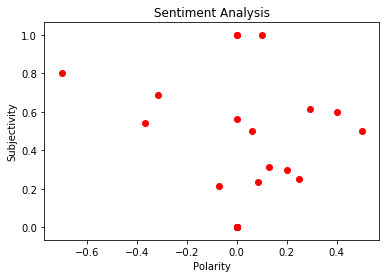

In [16]:
# Scatter plot of the polarity numeric scores.

plt.scatter(df.Polarity, df.Subjectivity, color='red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')                      # 0.00 is neutral
plt.ylabel('Subjectivity')

In [21]:
# Sentiment label breakdown, total, percentage 

# Create a sentiment dataframe. 
df_sentiment = pd.DataFrame(
    df.Sentiment.value_counts(normalize=True)*100 
)

# Add a column called total. Set to the value counts of the df.Sentiment column.
df_sentiment['Total'] = df.Sentiment.value_counts() 

df_sentiment['Percentage'] = df.Sentiment.value_counts() / 100 * 100                         # the percentage column should total 100 percent. this is not calculatiing correctly. 


df_sentiment


,Sentiment,Total,Percentage
Positve,40.909091,9,9.0
Neutral,40.909091,9,9.0
Negative,18.181818,4,4.0


In [31]:

# create stopwords
nltk.download('stopwords')
stpwrd = set(nltk.corpus.stopwords.words('english'))

# Combining all tweets text
allWords = ' '.join([twts for twts in df['Tweets']])

# Bring in an image of Elon as a mask to shape our word cloud.

# Define a function WC to make word cloud.

def WC(data, title, mask=None):
    wc =  WordCloud(                              # make a WordCloud object.
        width = 500,
        height = 500,
        scale=3,
        random_state=21,
        colormap='autumn',
        mask=mask,
        stopwords=stpwrd,
        collocations=True
    ).generate(data)                                # take the allWords and generate cloud based on that. 

    plt.figure(figsize=(20,12))
    Cloud.to_file(str(title)+'.png') 
    plt.imshow(wc)
    plt.axis('off')
    fontdict = {'fontsize' : 20, 'fontweight' : 'bold'}
    plt.title(title, fontdict=fontdict)
    plt.show()                                      # no return statement???? 

# call the WC function, pass 

WC(allWords, 'Elon Musk', mask=Elon)              # no word cloud is produced by this line. 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jakel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'Elon' is not defined

In [28]:
wc = WordCloud().generate(allWords)
plt.show()